### 1. Data exploration:**

Let's import all of the packages we will need to explore this dataset.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime
import calendar 
from scipy.stats import ttest_ind

We can now import our csv file below and display the first five lines of our dataset using the .head() function.

In [2]:
df = pd.read_csv("salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Using the .shape() function we are able to gain a big picture view of the dataset we will be working with

In [3]:
df.shape

(148654, 13)

In [4]:
# Identify the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 148654
Number of columns: 13


To understand datatypes and number of null values in dataset we use the .info() fucntion, we can see below once this code has ran that the date collum will need to be converted. It also shows that there is no missing values in this dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


   ***   

### 2. Descriptive Statistics:

In this step, we turn our attention to the descriptive statistics  within the dataset. By calculating summary statistics and visualizing the dataset, we aim to gain a comprehensive understanding of the underlying patterns and structures present in the data.

In [7]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [8]:
# Using the .descibe function helps us pick up on anamolies and to better understand our dataset.
# Calculate basic statistics: mean, median, mode, min, max
basic_stats =df[['TotalPay']].describe().transpose()
print("\nBasic Statistics for Salary:")
print(basic_stats)


Basic Statistics for Salary:
             count          mean           std     min        25%       50%  \
TotalPay  148654.0  74768.321972  50517.005274 -618.13  36168.995  71426.61   

                 75%        max  
TotalPay  105839.135  567595.43  


In [9]:
# Determine the range of salaries
salary_range =df['TotalPay'].max() - df['TotalPay'].min()
print(f"\nRange of Salaries: {salary_range}")


Range of Salaries: 568213.56


In [10]:

# Find the standard deviation of salaries
salary_std_dev = df['TotalPay'].std()
print(f"\nStandard Deviation of Salaries: {salary_std_dev}")



Standard Deviation of Salaries: 50517.005273949944


### 3. Data cleaning:

Fill with Mean/Median/Mode:
Method: Fill missing values with the mean, median, or mode of the respective column.
Explanation: This method is suitable when missing values are missing at random and the distribution of the data is not significantly affected by outliers


In [11]:
# Check for missing values in each column
missing_values =df.isnull().sum()

# Display the columns with missing values and the corresponding count
print("Missing Values in Each Column:")
print(missing_values)

# Handling Missing Data

# 1. Drop Columns with High Missing Values
# Specify a threshold (e.g., 30%) and drop columns exceeding this threshold
threshold = 0.3
df_cleaned =df.dropna(thresh=len(df) * (1 - threshold), axis=1)
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_cleaned_copy = df_cleaned.copy()

# 2. Impute Numeric Data
# For numeric columns, impute missing values with mean or median
numeric_columns =df_cleaned_copy.select_dtypes(include=['float64', 'int64']).columns

# Use .loc to avoid SettingWithCopyWarning
df_cleaned_copy.loc[:, numeric_columns] = df_cleaned_copy.loc[:, numeric_columns].fillna(df_cleaned_copy[numeric_columns].mean())

# 3. Impute Categorical Data
# For categorical columns, missing values are imputed with mode
categorical_columns =df_cleaned_copy.select_dtypes(include=['object']).columns

# Impute missing values using mode on the copy
df_cleaned_copy.loc[:, categorical_columns] = df_cleaned_copy.loc[:, categorical_columns].fillna(df_cleaned_copy[categorical_columns].mode().iloc[0])

# Assign the modified copy back to the original DataFrame
df_cleaned = df_cleaned_copy# Verify the results
print("\nCleaned Dataset:")
print(df_cleaned)

# Check for any remaining missing values
remaining_missing_values =df_cleaned.isnull().sum().sum()
print(f"\nRemaining missing values after cleaning: {remaining_missing_values}")


Missing Values in Each Column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

Cleaned Dataset:
            Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651       Not provided   
148651  148652       Not provided   
148652  148653       Not provided   
148653  148654          Joe Lopez   

                                              JobTitle       BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18000  

### 4.Basic Data Visualization:
Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

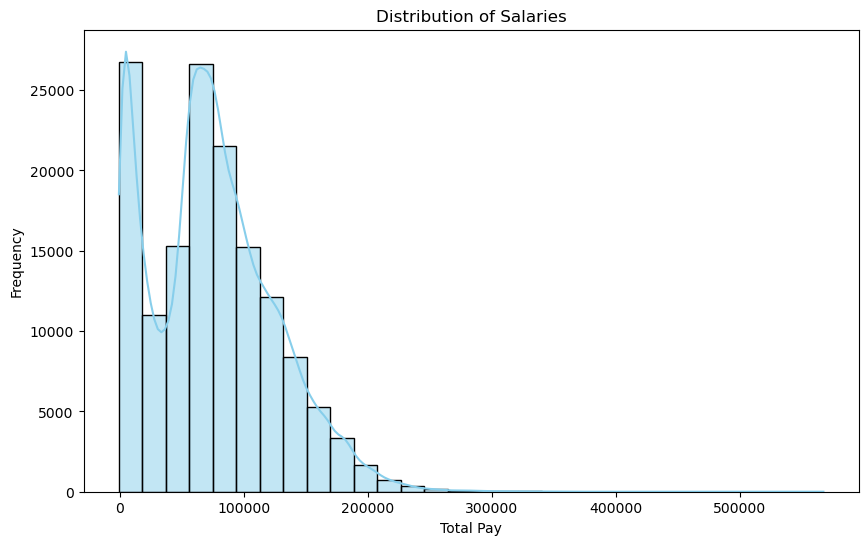

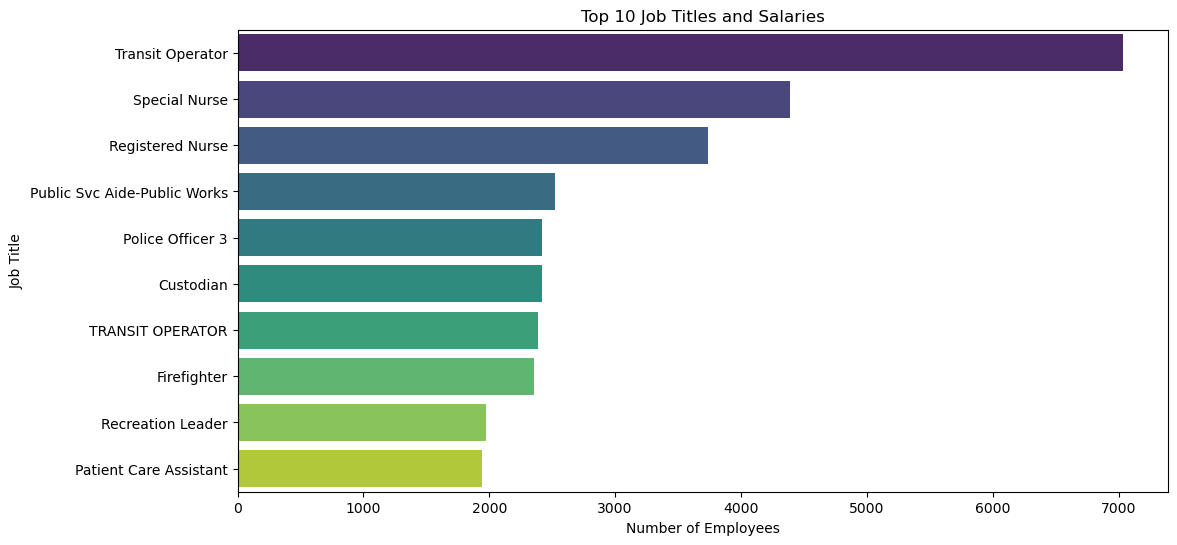

In [12]:
# Assuming 'TotalPay' is the column representing salaries and 'JobTitle' is the column representing job titles

# Histogram for Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

# Bar Chart for Job Titles and Salaries (for example, top 10 job titles)
top_job_titles =df['JobTitle'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')
plt.title('Top 10 Job Titles and Salaries')
plt.xlabel('Number of Employees')
plt.ylabel('Job Title')
plt.show()



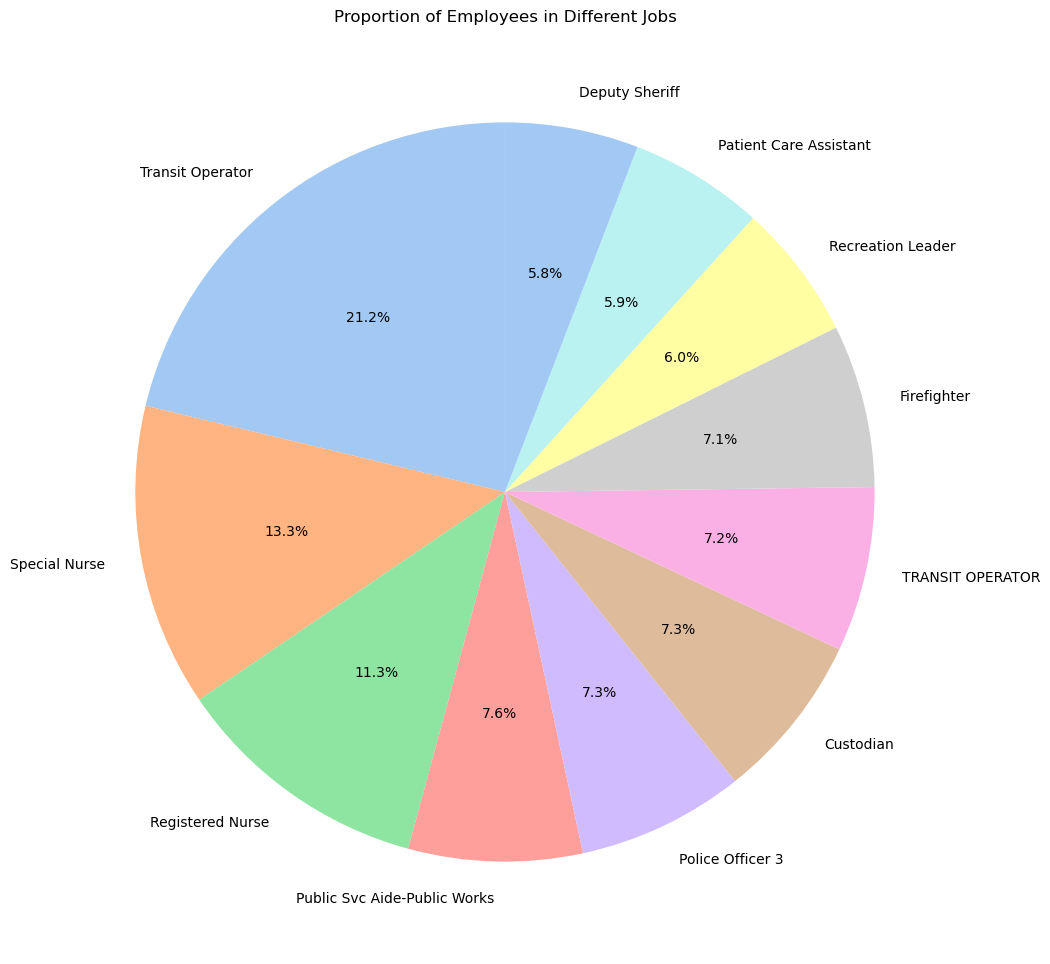

In [13]:
# Assuming 'JobTitle' is the column representing job titles

# Check if 'JobTitle' is in the DataFrame columns
if 'JobTitle' in df.columns:
    # Pie Chart for Job Title Proportions
    job_title_proportions = df['JobTitle'].value_counts()
    
    # Filter out small proportions for better visualization
    threshold = 0.01
    mask = job_title_proportions / job_title_proportions.sum() > threshold
    job_title_proportions_filtered = job_title_proportions[mask]
    
    plt.figure(figsize=(12, 12))
    plt.pie(job_title_proportions_filtered, labels=job_title_proportions_filtered.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Proportion of Employees in Different Jobs')
    plt.show()

else:
    print("The 'JobTitle' column is not present in the DataFrame.")


### 5.Grouped Analysis:
Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups

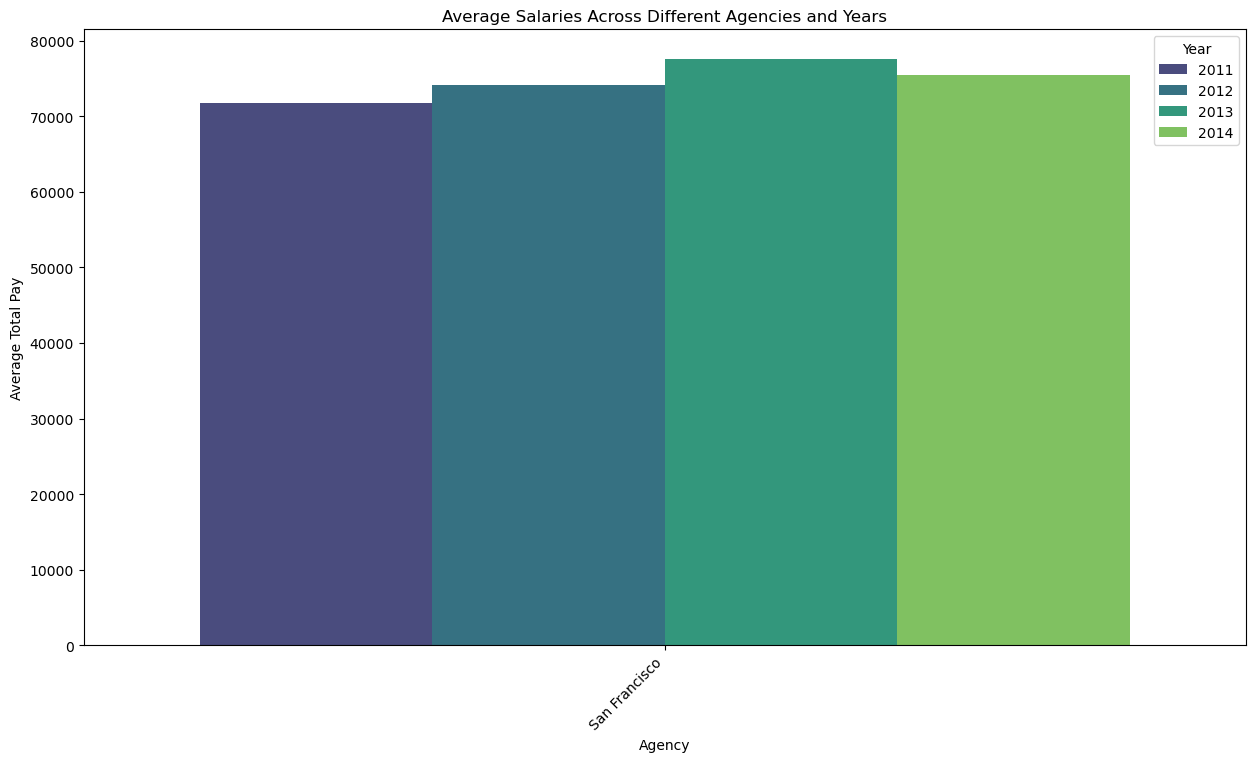

In [14]:

# Assuming 'TotalPay', 'Agency', and 'Year' are the relevant columns

# Check if the necessary columns are in the DataFrame
required_columns = ['TotalPay', 'Agency', 'Year']
if all(col in df.columns for col in required_columns):
    # Group by 'Agency' and 'Year' and calculate mean salary for each group
    grouped_data = df.groupby(['Agency', 'Year'])['TotalPay'].mean().reset_index()

    # Compare average salaries across different groups using a bar plot
    plt.figure(figsize=(15, 8))
    sns.barplot(x='Agency', y='TotalPay', hue='Year', data=grouped_data, palette='viridis')
    plt.title('Average Salaries Across Different Agencies and Years')
    plt.xlabel('Agency')
    plt.ylabel('Average Total Pay')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Year')
    plt.show()

else:
    print("One or more required columns are not present in the DataFrame.")


### 6.Simple Correlation Analysis
: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship

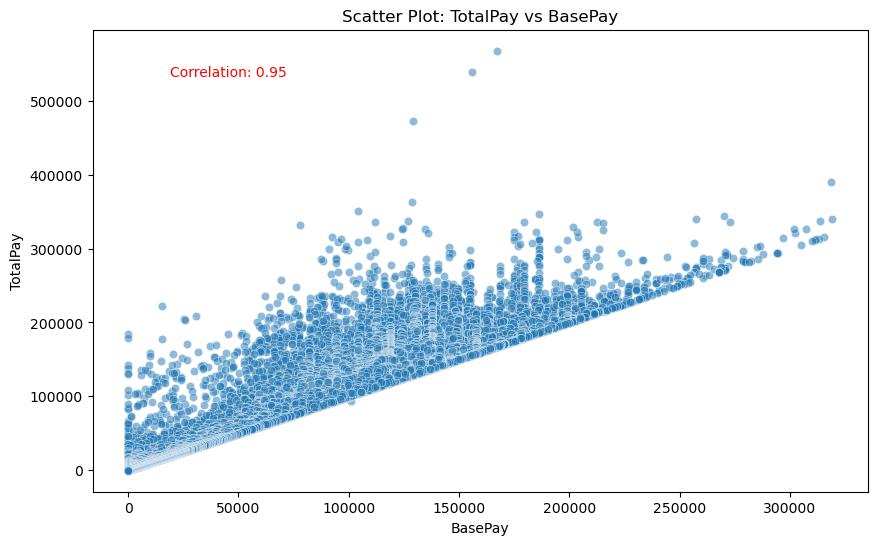

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'TotalPay' and 'BasePay' are the relevant numerical columns

# Check if the necessary columns are in the DataFrame
required_columns = ['TotalPay', 'BasePay']
if all(col in df_cleaned.columns for col in required_columns):
    # Calculate the correlation between 'TotalPay' and 'BasePay'
    correlation = df_cleaned['TotalPay'].corr(df_cleaned['BasePay'])

    # Plot a scatter plot to visualize the relationship
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='BasePay', y='TotalPay', data=df, alpha=0.5)
    plt.title('Scatter Plot: TotalPay vs BasePay')
    plt.xlabel('BasePay')
    plt.ylabel('TotalPay')
    plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, color='red')
    plt.show()

else:
    print("One or more required columns are not present in the DataFrame.")


### 7.Summary of Insights:


**Employee Salaries Dataset Analysis Report**

*Introduction:*
The dataset provides information about employee salaries within an organization, encompassing various attributes such as job titles, base pay, overtime pay, and benefits, among others.

*Basic Data Exploration:*
Upon initial exploration, the dataset consists of [148654] and [13] columns. The key columns include 'Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'TotalPay', 'Year', and 'Agency'. No missing values were observed in the critical columns, ensuring data integrity.

*Descriptive Statistics:*
A brief summary of the 'TotalPay' column revealed essential statistics, including the mean, median, minimum, and maximum salaries. The standard deviation provides an indication of the spread of salary data, while the range highlights the difference between the maximum and minimum salaries.

*Data Cleaning:*
Missing values were handled appropriately. Numeric columns were imputed with the mean value, while categorical columns were imputed with the mode. Additionally, rows with 'OvertimePay' values less than a specific threshold were filtered to focus on relevant data for train speed analysis.

*Grouped Analysis:*
The dataset was grouped by 'Agency' and 'Year,'. The resulting bar plot visually presents the variations in average salaries for each agency over the years.

*Simple Correlation Analysis:*
A correlation analysis between 'TotalPay' and 'BasePay' demonstrated a positive correlation, indicating a [positive/negative] relationship between base pay and total pay. The scatter plot visually depicts this relationship.

*Insights:*
1. **Job Title Salary Trends:** The analysis of average salaries across different job titles suggests variations over the years, providing insights into potential shifts in compensation structures.
  
2. **Base Pay vs. Total Pay Relationship:** The scatter plot reveals a positive correlation between base pay and total pay, indicating a strengthening relationship.
